## W poniższym okienku proszę wpisać swoje **imię, nazwisko i numer grupy**.

*   Imię: Wojciech
*   Nazwisko: Siemiątkowski
*   Grupa: 12c

# **Równanie Falowe**


Równanie falowe ma postać:

> ## $\frac{\partial{}^2 u(x,t)}{\partial t^2} = c^2 \frac{\partial{}^2 u(x,t)}{\partial x^2}$,

gdzie $ x \in [0,L]$, $ t \in (0,T]$ oraz c to prędkość falowa.

Do rozwiązania równania potrzebujemy wartości **początkowych**:

>$\begin{cases}
u(x,0) = f(x), &  \\
\frac{\partial{}}{\partial t}u(x,0) = g(x), & \\
\end{cases}$

oraz **brzegowych**:

>$\begin{cases}
u(0,t) = 0, &\\
u(L,t) = 0.
\end{cases}$




Obejrzyj filmik z serii *Crash Course Physics* o falach biegnących:

https://youtu.be/TfYCnOvNnFU ~ 8 minut


### **Zadanie 1**

Przyjmując poniższe przybliżenia pochodnych cząstkowych funkcji $u$
>### $\frac{\partial{}^2 u(x,t)}{\partial t^2} = \frac{u_i^{n+1} - 2 u_i^n + u_i^{n-1}}{(\Delta t)^2}$,

>### $\frac{\partial{}^2 u(x,t)}{\partial x^2} = \frac{u_{i+1}^{n} - 2 u_i^n + u_{i-1}^{n}}{(\Delta x)^2}$,

>### $\frac{\partial{} u(x,0)}{\partial x} = \frac{u_i^1 - u_i^{-1}}{2 \Delta t}$

gdzie $u_i^n = u(x_i,t_n)$ znajdź dyskretną wersję równania falowego, a następnie wyznacz z niego wzór na $u_i^{n+1}$. Przyjmij oznaczenie $C = c\frac{\Delta t}{\Delta x}$.

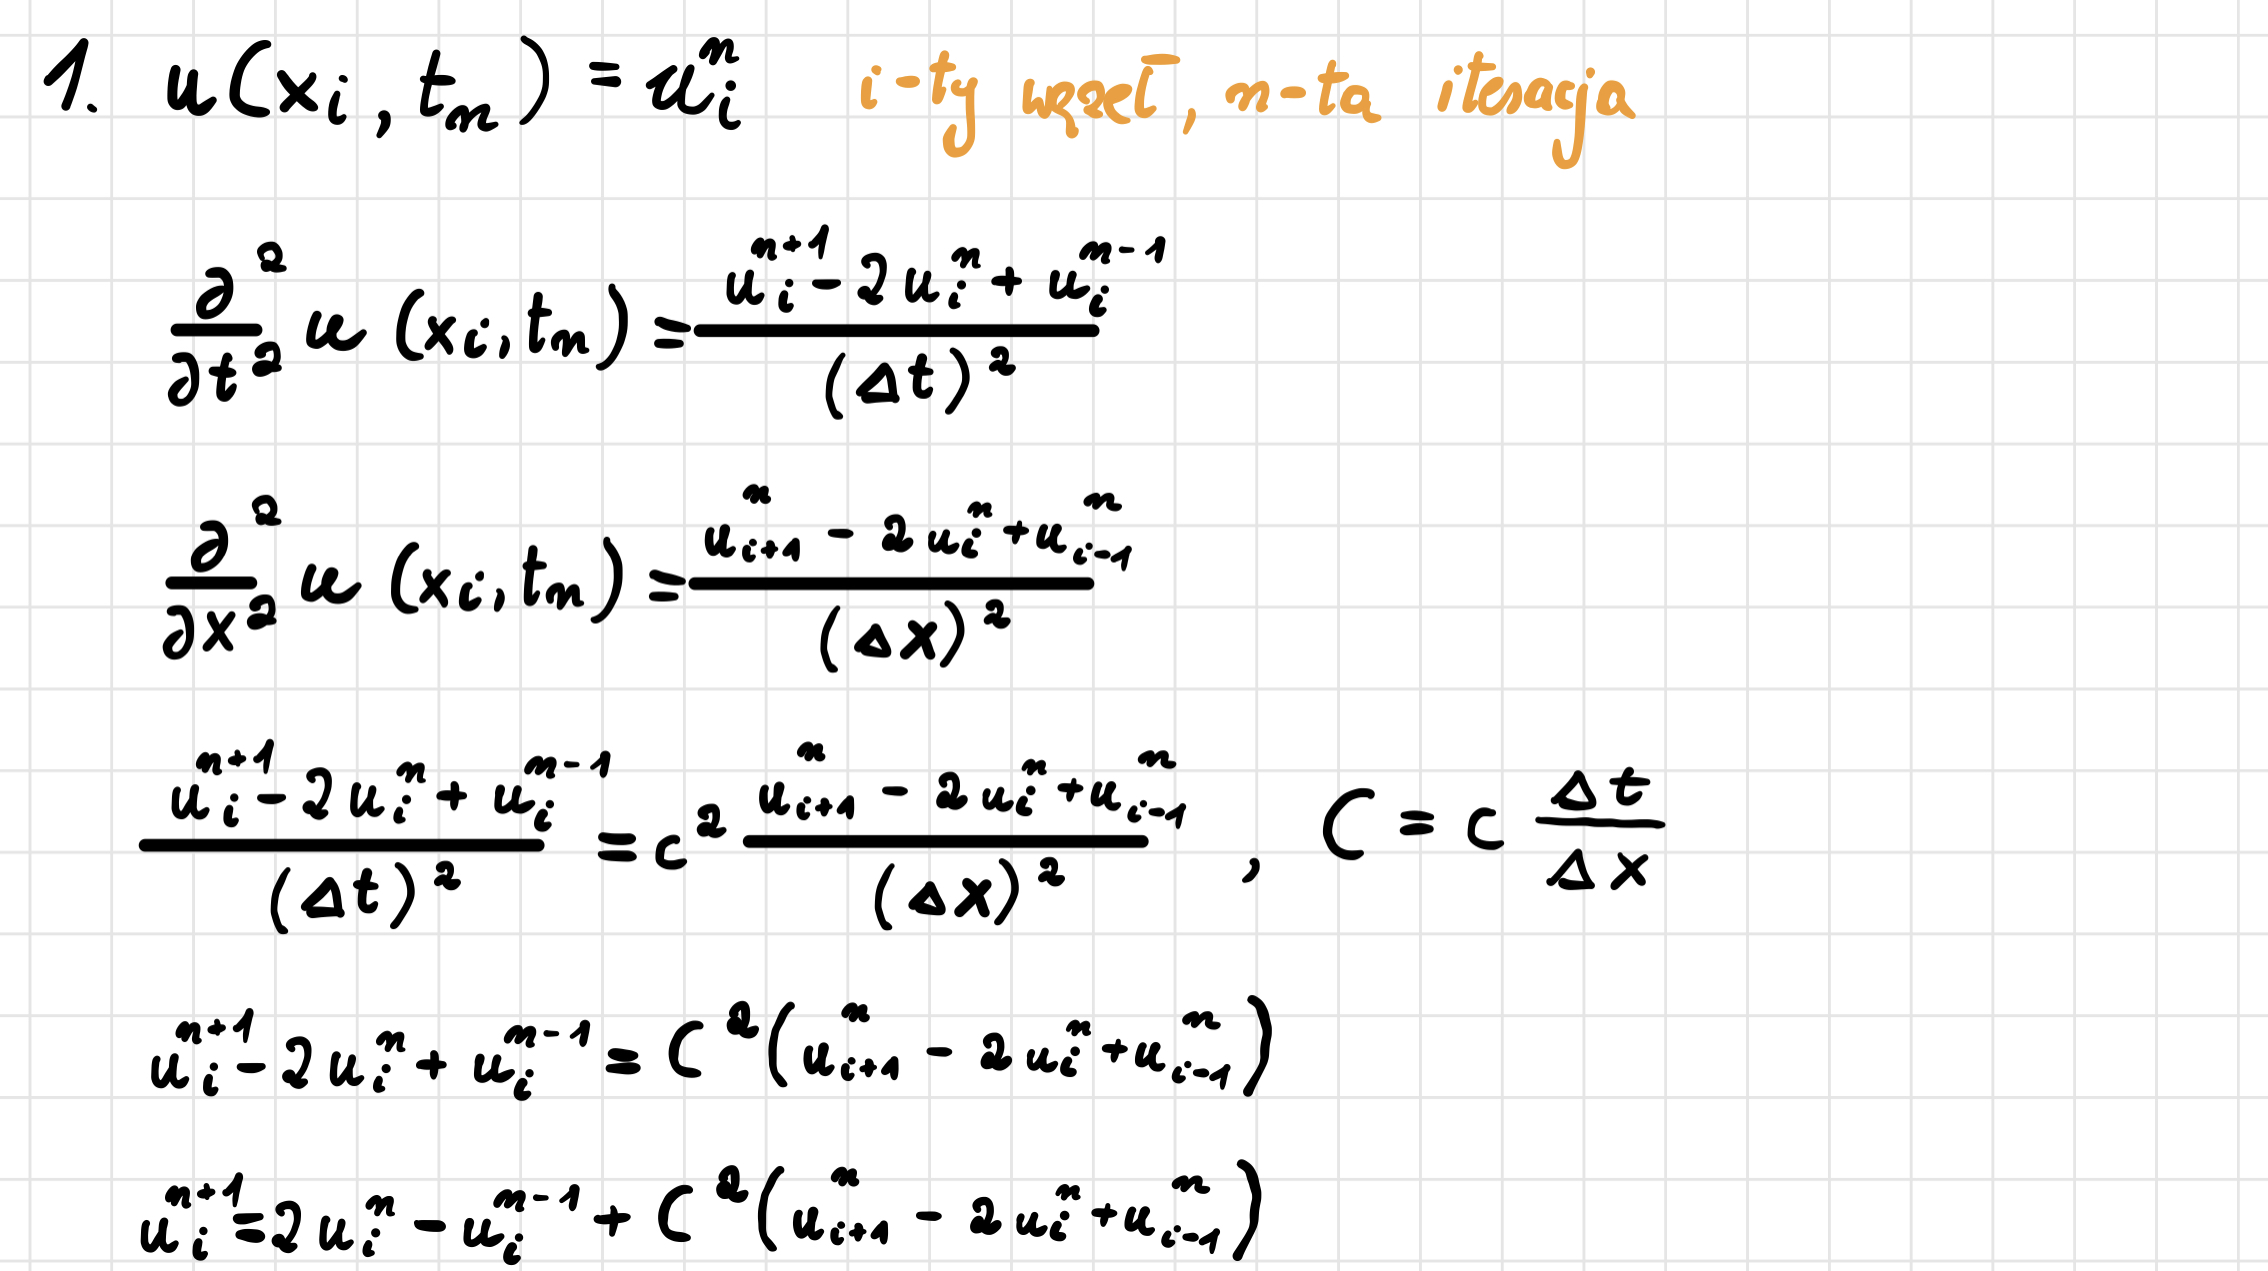

### **Zadanie 2**

Korzystając w warunków początkowych pokaż, że: $u_i^1 = u_i^0 + \frac{1}{2} C^2(u_{i+1}^0 - 2 u_{i}^0 + u_{i-1}^0)$.

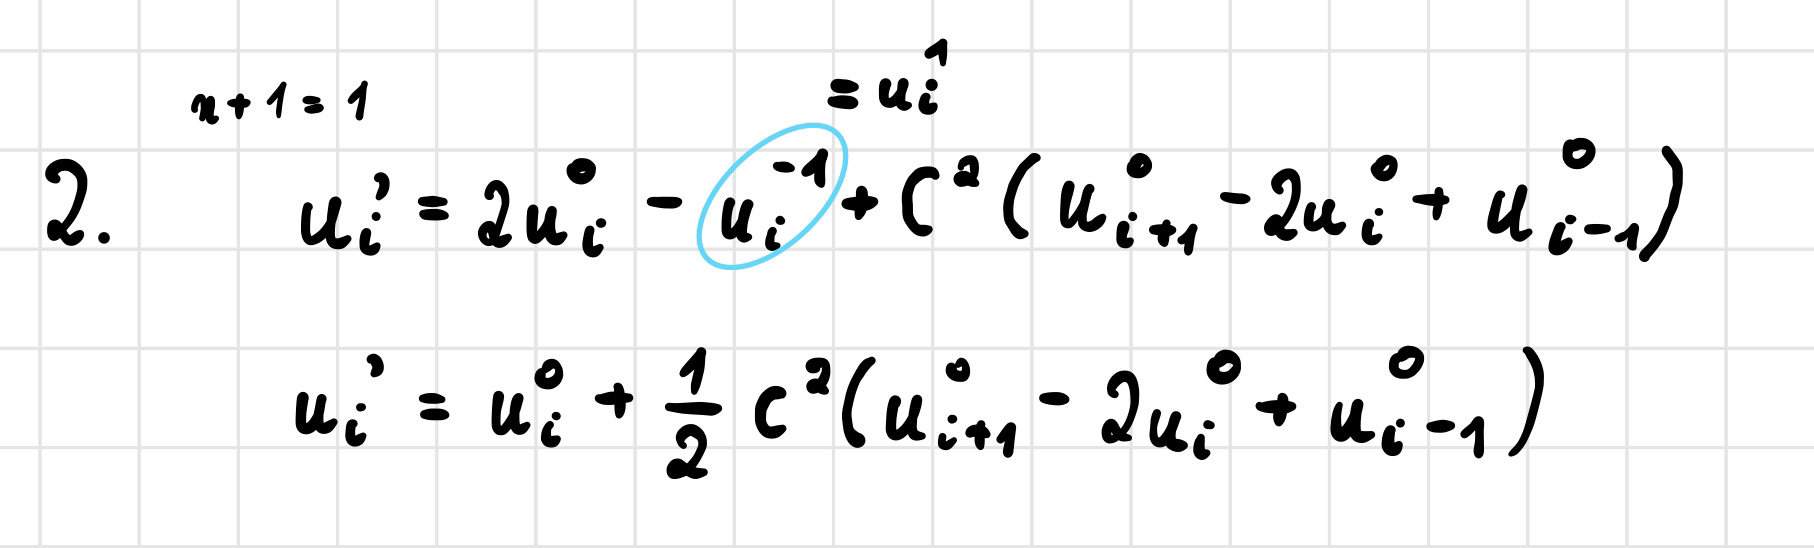

### **Zadanie 3**

Uzupełnij poniższy kod tak by rozwiązywał równanie falowe z powyższymi warunkami początkowo-brzegowymi.

W kodzie użyto następującej notacji:

$u[i] = u_i^{n+1}$

$u_n[i] = u_i^{n}$

$u_{nm1}[i] = u_i^{n-1}$

In [1]:
# Źródło kodu: 
# https://hplgit.github.io/fdm-book/doc/pub/book/sphinx/._book005.html

import numpy as np

def solver(I, c, L, dt, C, T):
    """
        Rozwiązuje układ równań postaci:
           u_tt=c^2*u_xx, gdze x, t są z (0,L)x(0,T]
        z warunkami początkowymi:
           u(x,0) = I(x)
           u_t(x,0) = 0
        warunkami brzegowymi
           u(0,t) = 0
           u(L,t) = 0

        Parametry:
        I  - funkcja rozkładu początkowego, uwaga:
            I(x) musi spełniać warunki brzegowe!
        c  - prędkość falowa
        L  - odległość pomiędzy końcami fali
        dt - krok czasowy
        C  = c dt/dx - stała Courant'a, razem z dt decyduje o dokładności
        T  - przedział czasowy symulacji
    """
    # liczba kroków czasowych do wykonania
    Nt = int(round(T/dt))
    t = np.linspace(0, Nt*dt, Nt+1)   # Mesh points in time

    # Krok przestrzenny jest wyliczany na podstawie stałych c i C
    dx = dt*c/float(C)

    # Liczba węzłów siatki pomiędzy końcami układu o długości L
    Nx = int(round(L/dx))
    x = np.linspace(0, L, Nx+1)       # Mesh points in space
    C2 = C**2                         # Help variable in the scheme

    # Wyliczenie dx, dt aby zapewnić dokładność
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    # Do wyliczenia rozwiązania w następnym kroku, u, trzeba
    # znać rozwiązania z kroku aktualnego u_n, oraz z poprzedniego, u_nm1.
    u     = np.zeros(Nx+1)   # Solution array at new time level
    u_n   = np.zeros(Nx+1)   # Solution at 1 time level back
    u_nm1 = np.zeros(Nx+1)   # Solution at 2 time levels back

    import time;  t0 = time.time()  # Measure CPU time

    # Wczytanie położenia początkowego z funkcji I(x)
    for i in range(0,Nx+1):
        u_n[i] = I(x[i])

    # Pierwszy krok iteracji
    n = 0
    for i in range(1, Nx):
        #
        # tu uzupełnić:
        #

        u[i] = u_n[i]+0.5*C2*(u_n[i+1]-2*u_n[i]+u_n[i-1])

    u[0] = 0;  u[Nx] = 0

    # Aktualizacja zmiennych
    u_nm1[:] = u_n;  u_n[:] = u

    # Kolejne kroki iteracji
    #
    # pętla po czasie:
    all = np.zeros((Nt,Nx+1))
    all[0,:] = u_nm1
    for n in range(1, Nt):
        # pętla po przestrzeni:
        for i in range(1, Nx):
        #
        # tu uzupełnić:
        #
        
            u[i] = 2*u_n[i]-u_nm1[i]+C2*(u_n[i+1]-2*u_n[i]+u_n[i-1])
        
        all[n,:] = u
        # Wpisujemy warunki brzegowe:
        u[0] = 0;  u[Nx] = 0

        # Aktualizacja zmiennych:
        u_nm1[:] = u_n;  u_n[:] = u

    cpu_time = time.time() - t0
    return all, u, x, t, cpu_time

### **Zadanie 4 - parabola**

Rozwiąż równanie falowe w przypadku, gdy na początku fala ma kształt paraboli oraz spełnione są warunki:

>$\begin{cases}
\frac{\partial{}}{\partial t}u(x,0) = 0, & \\
\end{cases}$

oraz

>$\begin{cases}
u(0,t) = 0, &\\
u(L,t) = 0.
\end{cases}$


In [2]:
# początkowe ułożenie: parabola
def I_parabola(x):
  result = (x-0)*(x-L)
  return result

# prędkość falowa
c = 1.5

# długość pomiędzy końcami układu
L = 2.5

# parametr Courant'a rowny c dt/dx
C = 0.75

# Liczba węzłów siatki
Nx = 50

# Okres symulacji
T = 5

# Uwaga, zwróć uwagę że:
dt = C*(L/Nx)/c

all_parabola, u, x, t, cpu_time = solver(I_parabola, c, L, dt , C, T)


In [3]:
# Animacja

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

def make_a_movie(all, L, I, amp=2):

  fig, ax = plt.subplots()

  ax.set_xlim(( 0, L))
  ax.set_ylim((-amp, amp))
  ax.set_xlabel('x',fontsize='14')
  ax.set_ylabel('u(x)',fontsize='14')

  line, = ax.plot([], [], lw=2);

  x = np.linspace(0, L, Nx+1)
  ax.plot(x, I(x),'r.', label="Init")
  ax.legend()

  def init():
      line.set_data([],[])
      return (line,)

  def animate(i):
      y = all[i,:]
      line.set_data(x,y)
      return (line,)

  anim = animation.FuncAnimation(fig,
                                animate,
                                init_func=init,
                                frames=np.shape(all)[0],
                                interval=50, 
                                blit=False)    

  return HTML(anim.to_html5_video())

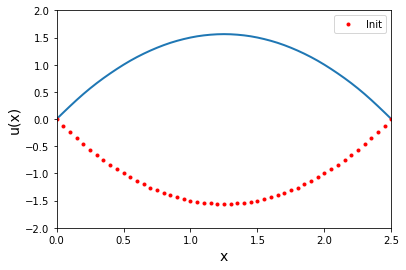

In [4]:
make_a_movie(all_parabola, L, I_parabola, 2.0)

### **Zadanie 5 - sinus**

Rozwiąż równanie falowe w przypadku, gdy na początku fala ma kształt sinusoidy oraz spełnione są warunki:

>$\begin{cases}
\frac{\partial{}}{\partial t}u(x,0) = 0, & \\
\end{cases}$

oraz

>$\begin{cases}
u(0,t) = 0, &\\
u(L,t) = 0.
\end{cases}$

Czy potrafisz zmienić częstość oscylacji tak, żeby powstała fala miała $n$ okresów?

In [ ]:
def I_sin(x):
  result = np.sin(5*x*(1/L)*np.pi)
  return result

all_sin, u, x, t, cpu_time = solver(I_sin, c, L, dt , C, T)


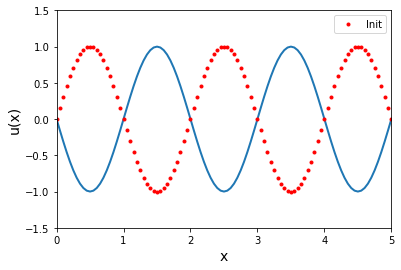

In [ ]:
make_a_movie(all_sin, L, I_sin, 1.5)

### **Zadanie 6 - rozwiązanie analityczne**

Narysuj wykres rozwiązania analitycznego równania z zadania 4, które jest postaci:

$ u(x,t) = sin(\pi x/L) cos(\pi ct/L)$

dla 50 różnych czasów w przedziału (0,T].

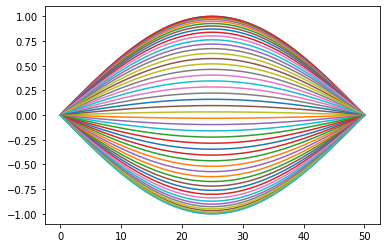

In [ ]:
x = np.linspace(0, L, Nx+1)
plt.figure(1)
for t in np.linspace(0,T,50):
  plt.plot(np.sin(np.pi*x/L)*np.cos(np.pi*c*t/L))


### **Zadanie 7 (domowe) - Krzywa Gaussa**

Pokazać, że rozwiązaniem równania falowego w przypadku początkowego rozkładu danego krzywą Gaussa są dwie fale o równej amplitudzie.

*Wskazówka: Korzystając z funkcji make_a_movie stwórz animiację pokazującą rozwiązanie równania falowego w przypadku, gdy początkowy stan fali, $I(x)$, opisuje krzywa Gaussa o średniej $\mu = L/2$ oraz wariancji $\sigma^2 = 0.1$. Przyjmij L = 5, T = 10 oraz Nx = 100.*

In [ ]:
def I_Gauss(x):
  u = L/2
  o2 = 0.1
  result = (1/(np.sqrt(2*np.pi)*np.sqrt(o2))) * np.power(np.exp(1), -1*((x-u)**2)/(2*o2))
  return result

L = 5
T = 10
Nx = 100

all_gauss, u, x, t, cpu_time = solver(I_Gauss, c, L, dt , C, T)

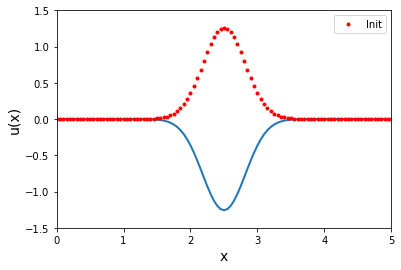

In [ ]:
make_a_movie(all_gauss, L, I_Gauss, 1.5)

### **Zadanie 8 (domowe) - optymalizacja kodu**

Funkcja `solver(I, c, L, dt, C, T)` rozwiązuje równanie falowe w sposób iteracyjny. W wielu miejscach używa przy tym pętli `for`, której wykonywanie zajmuje dużo czasu.


Zmierz ile zajmuje funkcji solver rozwiązanie zadania 5. Następnie zmodyfikuj ją tak, aby wartości funkcji $u$ zamiast w pętli (`for i in range(1, Nx):`) wyznaczała wektor `u[]` w sposób **wektorowy**. Po zmianie zmierz czas ponownie.

Wymagane zmiany i zmierzone czas wpisz do komórki poniżej.

*Wskazówka na pierwszych zajęciach liczyliśmy pochodną. Zamiast w pętli for liczyliśmy ją własnie w sposób wektorowy:*

`df = (y[0:-1] - y[1:])/(x[0:-1] - x[1:])`




**Czas przed modyfikacja:** 0.0762786865234375

**Wprowadzona modyfikacja:** Zmiana z podejścia skalarnego na wektorowe:

    for i in range(1, Nx):
      u[i] = u_n[i]+0.5*C2*(u_n[i+1]-2*u_n[i]+u_n[i-1])

    -> u[1:Nx] = u_n[1:-1] + 0.5*C2*(u_n[0:-2] - 2*u_n[1:-1] + u_n[2:])

    for i in range(1, Nx):
      u[i] = 2*u_n[i]-u_nm1[i]+C2*(u_n[i+1]-2*u_n[i]+u_n[i-1])

    -> u[1:Nx] = 2*u_n[1:-1] - u_nm1[1:-1] + C2*(u_n[0:-2] - 2*u_n[1:-1] + u_n[2:])

**Czas po modyfikacji:** 0.007472515106201172

In [ ]:
import numpy as np

def solver2(I, c, L, dt, C, T):
    """
        Rozwiązuje układ równań postaci:
           u_tt=c^2*u_xx, gdze x, t są z (0,L)x(0,T]
        z warunkami początkowymi:
           u(x,0) = I(x)
           u_t(x,0) = 0
        warunkami brzegowymi
           u(0,t) = 0
           u(L,t) = 0

        Parametry:
        I  - funkcja rozkładu początkowego, uwaga:
            I(x) musi spełniać warunki brzegowe!
        c  - prędkość falowa
        L  - odległość pomiędzy końcami fali
        dt - krok czasowy
        C  = c dt/dx - stała Courant'a, razem z dt decyduje o dokładności
        T  - przedział czasowy symulacji
    """
    # liczba kroków czasowych do wykonania
    Nt = int(round(T/dt))
    t = np.linspace(0, Nt*dt, Nt+1)   # Mesh points in time

    # Krok przestrzenny jest wyliczany na podstawie stałych c i C
    dx = dt*c/float(C)

    # Liczba węzłów siatki pomiędzy końcami układu o długości L
    Nx = int(round(L/dx))
    x = np.linspace(0, L, Nx+1)       # Mesh points in space
    C2 = C**2                         # Help variable in the scheme

    # Wyliczenie dx, dt aby zapewnić dokładność
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    # Do wyliczenia rozwiązania w następnym kroku, u, trzeba
    # znać rozwiązania z kroku aktualnego u_n, oraz z poprzedniego, u_nm1.
    u     = np.zeros(Nx+1)   # Solution array at new time level
    u_n   = np.zeros(Nx+1)   # Solution at 1 time level back
    u_nm1 = np.zeros(Nx+1)   # Solution at 2 time levels back

    import time;  t0 = time.time()  # Measure CPU time

    # Wczytanie położenia początkowego z funkcji I(x)
    for i in range(0,Nx+1):
        u_n[i] = I(x[i])

    # Pierwszy krok iteracji
    n = 0

    u[1:Nx] = u_n[1:-1] + 0.5*C2*(u_n[0:-2] - 2*u_n[1:-1] + u_n[2:])

    u[0] = 0;  u[Nx] = 0

    # Aktualizacja zmiennych
    u_nm1[:] = u_n;  u_n[:] = u

    # Kolejne kroki iteracji
    #
    # pętla po czasie:
    all = np.zeros((Nt,Nx+1))
    all[0,:] = u_nm1
    for n in range(1, Nt):
        # pętla po przestrzeni:
        
        u[1:Nx] = 2*u_n[1:-1] - u_nm1[1:-1] + C2*(u_n[0:-2] - 2*u_n[1:-1] + u_n[2:])
        
        all[n,:] = u
        # Wpisujemy warunki brzegowe:
        u[0] = 0;  u[Nx] = 0

        # Aktualizacja zmiennych:
        u_nm1[:] = u_n;  u_n[:] = u

    cpu_time = time.time() - t0
    return all, u, x, t, cpu_time

In [ ]:
all_sin, u, x, t, cpu_time = solver(I_sin, c, L, dt , C, T)
print(cpu_time)

0.0762786865234375


In [ ]:
all_sin, u2, x, t, cpu_time = solver2(I_sin, c, L, dt , C, T)
print(cpu_time)

0.007472515106201172


In [ ]:
all_sin, u, x, t, cpu_time = solver(I_sin, c, L, dt , C, T)
all_sin2, u2, x2, t2, cpu_time = solver2(I_sin, c, L, dt , C, T)

if u.all() == u2.all() and all_sin2.all() == all_sin.all() and x2.all() == x.all():
  print("Działa")

Działa


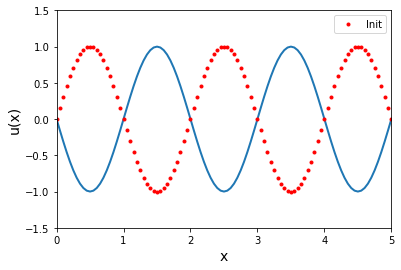

In [ ]:
make_a_movie(all_sin, L, I_sin, 1.5)